In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [ ]:

test=pd.read_csv(r"/content/drive/MyDrive/ML project/Capstone/Participants_Data_TGREDC/final_estate.csv",index_col=0)

In [ ]:
test.columns

Index(['Year', 'Locality', 'Estimated Value', 'Property', 'Residential',
       'num_rooms', 'carpet_area', 'property_tax_rate', 'Sale Price',
       'Segment', 'Gain'],
      dtype='object')

In [ ]:

# Creating a cluster column

In [ ]:
# creating a new dataframe for more clear understanding of the clusters


**Creating for Estimated Value and Gain also creating a dataframe from Sale Price and Gain to understand which works better by trial and error method**

In [ ]:
test_with_estimated=test[["Estimated Value","Gain"]]

In [ ]:
test_with_saleprice=test[["Sale Price","Gain"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
test_estimated_scaled=scaler.fit_transform(test_with_estimated)

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=10,init="k-means++")
test_with_saleprice["Clusters"]=kmeans.fit_predict(test_with_saleprice)

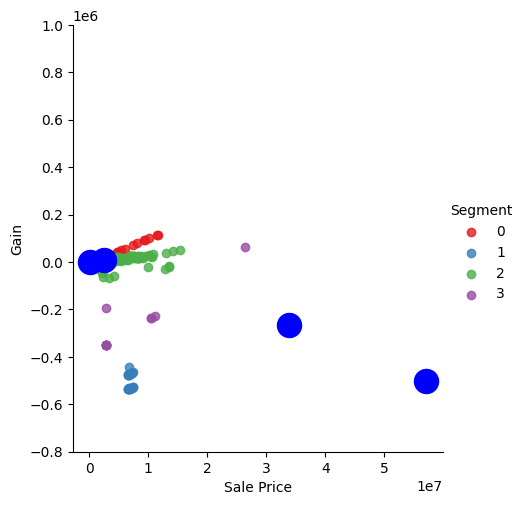

In [ ]:
sns.lmplot(data=test_s,x="Sale Price",y="Gain"
            ,fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")
plt.ylim(-800000,1000000)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
     s = 300, c = 'blue')
plt.show()


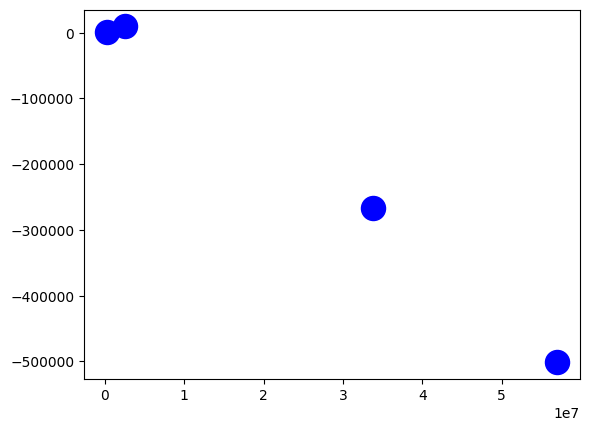

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue')

In [ ]:
test.head()

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain,Segment
0,2023,105,151400.0,5,4,3,947.0,1.46,214940.459833,635.404598,0
1,2023,118,686900.0,5,4,3,1051.0,1.46,984984.370814,2980.843708,0
2,2023,33,152030.0,5,4,3,925.0,1.46,215520.863365,634.908634,0
3,2023,93,156130.0,5,1,4,1210.0,1.46,214747.411008,586.174110,0
4,2023,6,108970.0,5,4,3,1089.0,1.46,165990.284492,570.202845,0


In [ ]:
Cluster0=test_s.loc[test_s["Clusters"]==0]
Cluster1=test_s.loc[test_s["Clusters"]==1]
Cluster2=test_s.loc[test_s["Clusters"]==2]
Cluster3=test_s.loc[test_s["Clusters"]==3]


In [ ]:
Cluster0.describe()

,Sale Price,Gain,Segment
count,4.310900e+04,43109.000000,43109.0
mean,3.145114e+05,1033.409971,0.0
std,3.028803e+05,1593.257008,0.0
min,8.007215e+04,281.955882,0.0
25%,1.530006e+05,522.761693,0.0
50%,2.174147e+05,696.281384,0.0
75%,3.589552e+05,1134.185388,0.0
max,1.167486e+07,116185.203999,0.0


In [ ]:
Cluster1.describe()

,Sale Price,Gain,Segment
count,2.800000e+01,28.000000,28.0
mean,6.850361e+06,-501580.574805,1.0
std,2.681366e+05,32343.093486,0.0
min,6.600275e+06,-536325.750981,1.0
25%,6.648902e+06,-531974.450317,1.0
50%,6.701898e+06,-502026.831981,1.0
75%,6.984237e+06,-472763.060717,1.0
max,7.345389e+06,-444702.778956,1.0


In [ ]:
Cluster2.describe()

,Sale Price,Gain,Segment
count,8.060000e+02,806.000000,806.0
mean,3.530514e+06,9754.324522,2.0
std,1.745823e+06,7628.914291,0.0
min,1.679035e+06,-68124.372534,2.0
25%,2.433277e+06,7389.699643,2.0
50%,3.082532e+06,9531.837746,2.0
75%,4.112347e+06,12036.715708,2.0
max,1.539461e+07,50383.042123,2.0


In [ ]:
Cluster3.describe()

,Sale Price,Gain,Segment
count,1.100000e+01,11.000000,11.0
mean,7.101574e+06,-266695.616965,3.0
std,7.316454e+06,126646.716093,0.0
min,2.824639e+06,-350892.007215,3.0
25%,2.831722e+06,-350824.683995,3.0
50%,2.858589e+06,-350509.336239,3.0
75%,1.040222e+07,-231816.240377,3.0
max,2.635366e+07,63888.322862,3.0


**Comparing the ranges of the Gain value in each Dataframe we can conclude that properties with the best investment gain is in the Cluster0 dataframe so we can say that this Dataframe is the Segment 0 according to our problem statement**

**Similiarly the seeing the range of values of Gain in Cluster1 dataframe we can say that the this is the worst properties in our dataset hence we can say that this is our Segment 3**

**Now for the Segment 1 and Segment 2 the remaining clusters are Cluster2 and Cluster3 so lets check first the range for both dataframe ,Upon further examination the maximum value for both are almost same so lets check how the values are spreaded by focusing on the 25% , 50% ,75% and mean of the data**

So we can say that the values in Cluster 3 mostly have their Gain Value as loss hence we can say that this can be Segment 2 and the Cluster 2 is Segment 1

In [ ]:
for index, row in test_s.iterrows():
    if row["Clusters"] == 0:
        test_s.loc[index, "Segment"] = 0
    elif row["Clusters"] == 1:
        test_s.loc[index, "Segment"] = 3
    elif row["Clusters"] == 2:
        test_s.loc[index, "Segment"] = 1
    else:
        test_s.loc[index, "Segment"] = 2


In [ ]:
test_s["Segment"]=test_s["Segment"].astype("int")

In [ ]:
test_s.drop("Clusters",axis=1,inplace=True)

In [ ]:
test_s.head()

,Sale Price,Gain,Segment
0,214940.459833,635.404598,0
1,984984.370814,2980.843708,1
2,215520.863365,634.908634,0
3,214747.411008,586.174110,0
4,165990.284492,570.202845,0
